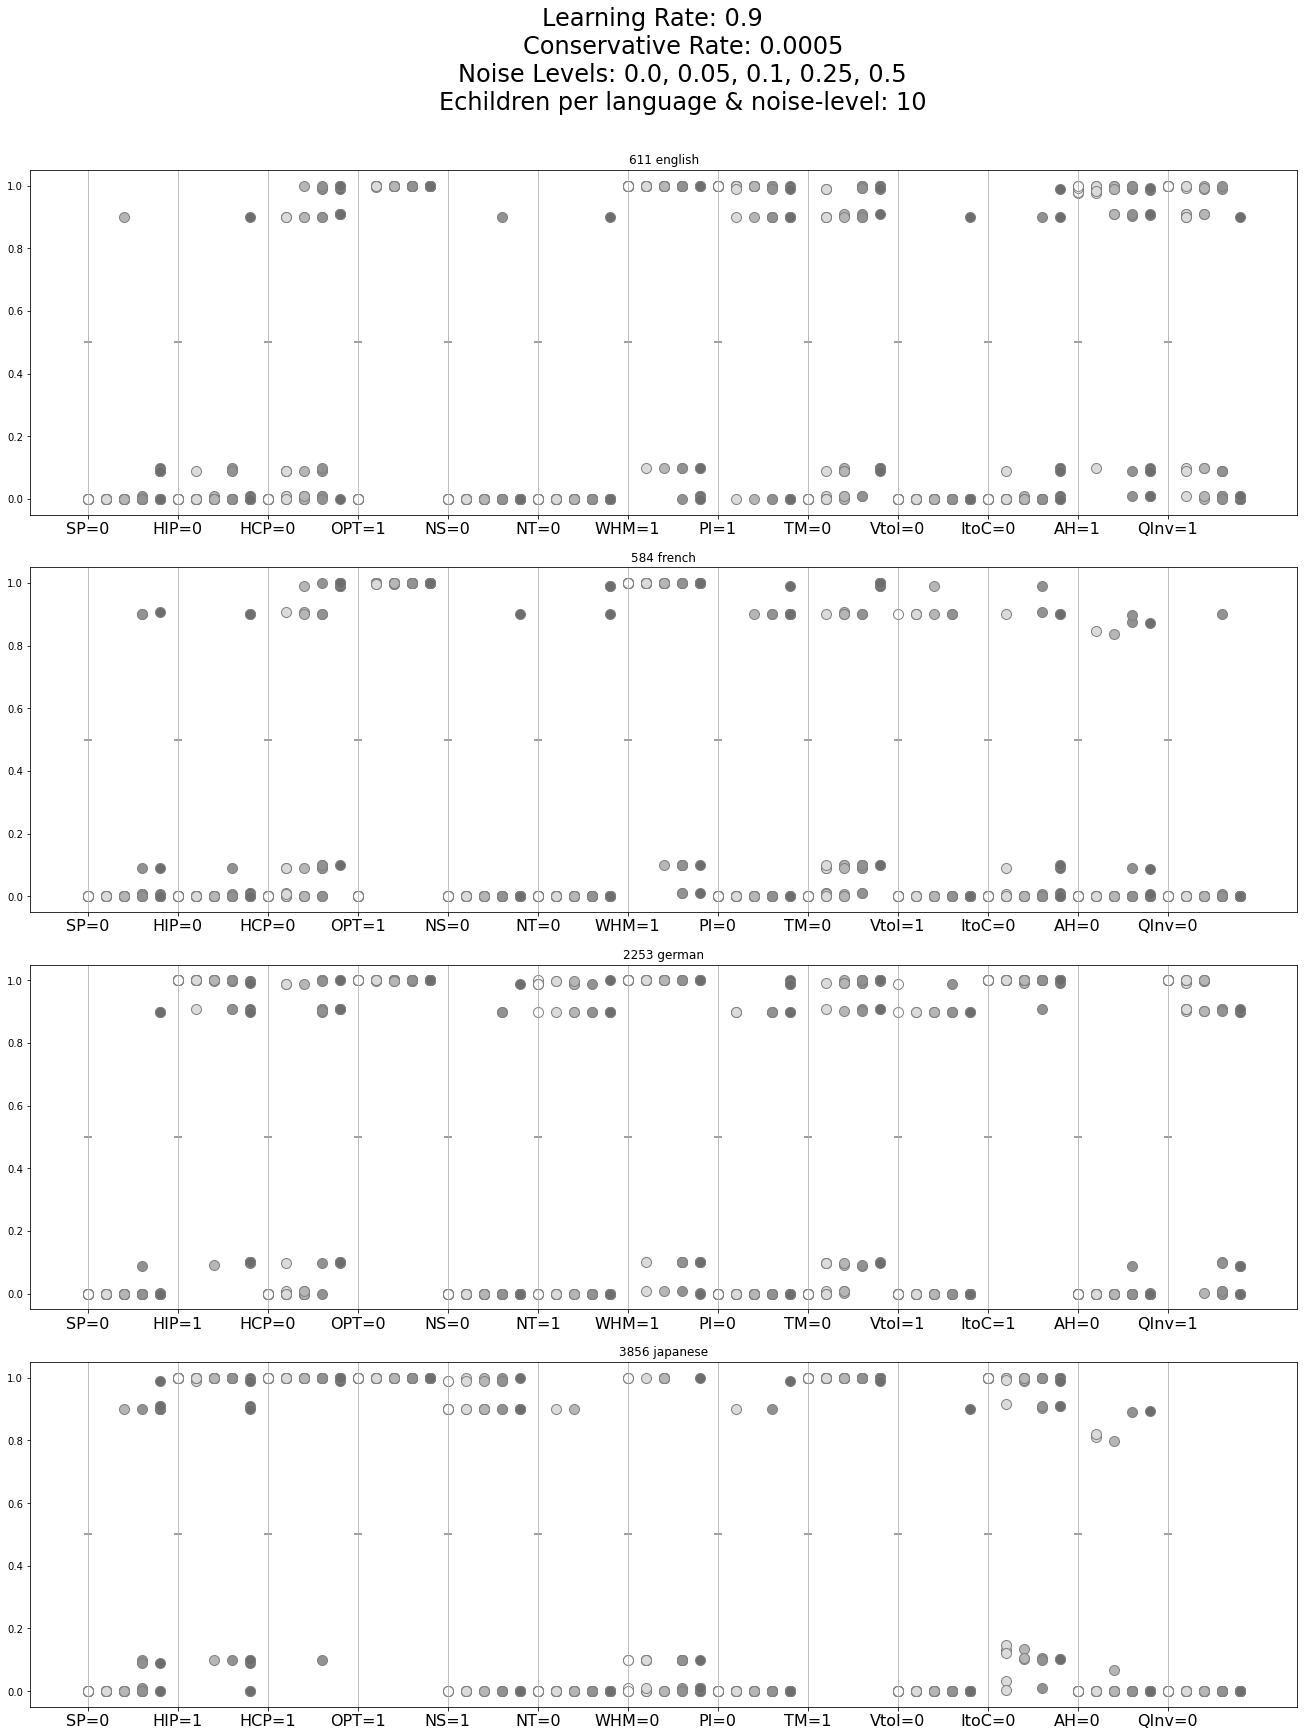

In [1]:

import glob
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


plt.rcParams['figure.figsize'] = 18, 6 * 4

# PARAMS_NOT_IMPLEMENTED = ['OPT', 'ItoC', 'QInv']


languages = {
    611: 'english',
    584: 'french',
    2253: 'german',
    3856: 'japanese'
}

colors = [[1-(n/7)] * 3 + [1] for n in range(5)]

def scatter_output(pathname, image_output):
    hyperparams = re.search(r'rate:(?P<rate>.*)_consrate:(?P<consrate>.*)\.csv', pathname).groupdict()
    df = pd.read_csv(pathname)
    parameter_names = [p
                       for p in df.columns 
                       if p[0].isupper()]
    
    fig, axes = plt.subplots(4, 1, constrained_layout=True)    
    fig.suptitle(
        """Learning Rate: {rate}
        Conservative Rate: {consrate}
        Noise Levels: {noise_levels}
        Echildren per language & noise-level: {num_echildren}
        """.format( 
             noise_levels=', '.join(str(x) for x in df.noise.unique()),
            num_echildren=','.join(str(x) for x in df.groupby(['language', 'noise']).size().unique()),
            **hyperparams),
        fontsize=24)
    
    for grammar_id, ax in zip(df.language.unique(), axes):
        for (noise_level, noise_amount) in enumerate(df.noise.unique()):
            rows = df[df.language.eq(grammar_id) & df.noise.eq(noise_amount)][parameter_names].values

            for row in rows:
                ax.scatter(x=[m + noise_level/5 for m in range(13)],
                           y=row,
                           marker='o', 
                           s=100,
                           edgecolors='gray',
                           facecolors=colors[noise_level])

        ax.set_xticks(np.arange(0, len(parameter_names)))
        grammar_str = format(grammar_id, '013b')
        xlabels = ['{}={}'.format(name, grammar_str[num])
                   for num, name in enumerate(parameter_names)]
        ax.set_xticklabels(xlabels, fontsize=16, );
        ax.set_title('{} {}'.format(grammar_id, languages[grammar_id]))

        ax.scatter(np.arange(len(parameter_names)),
                    np.repeat(0.5, len(parameter_names)),
                    color='black',
                    alpha=0.5,
                    s=50,
                    marker='_')
        ax.grid(axis='x')
    fig.savefig(image_output)
    
scatter_output('../output_2020-10-28:17:21_rate:0.9_consrate:0.0005.csv', image_output='ex.pdf')

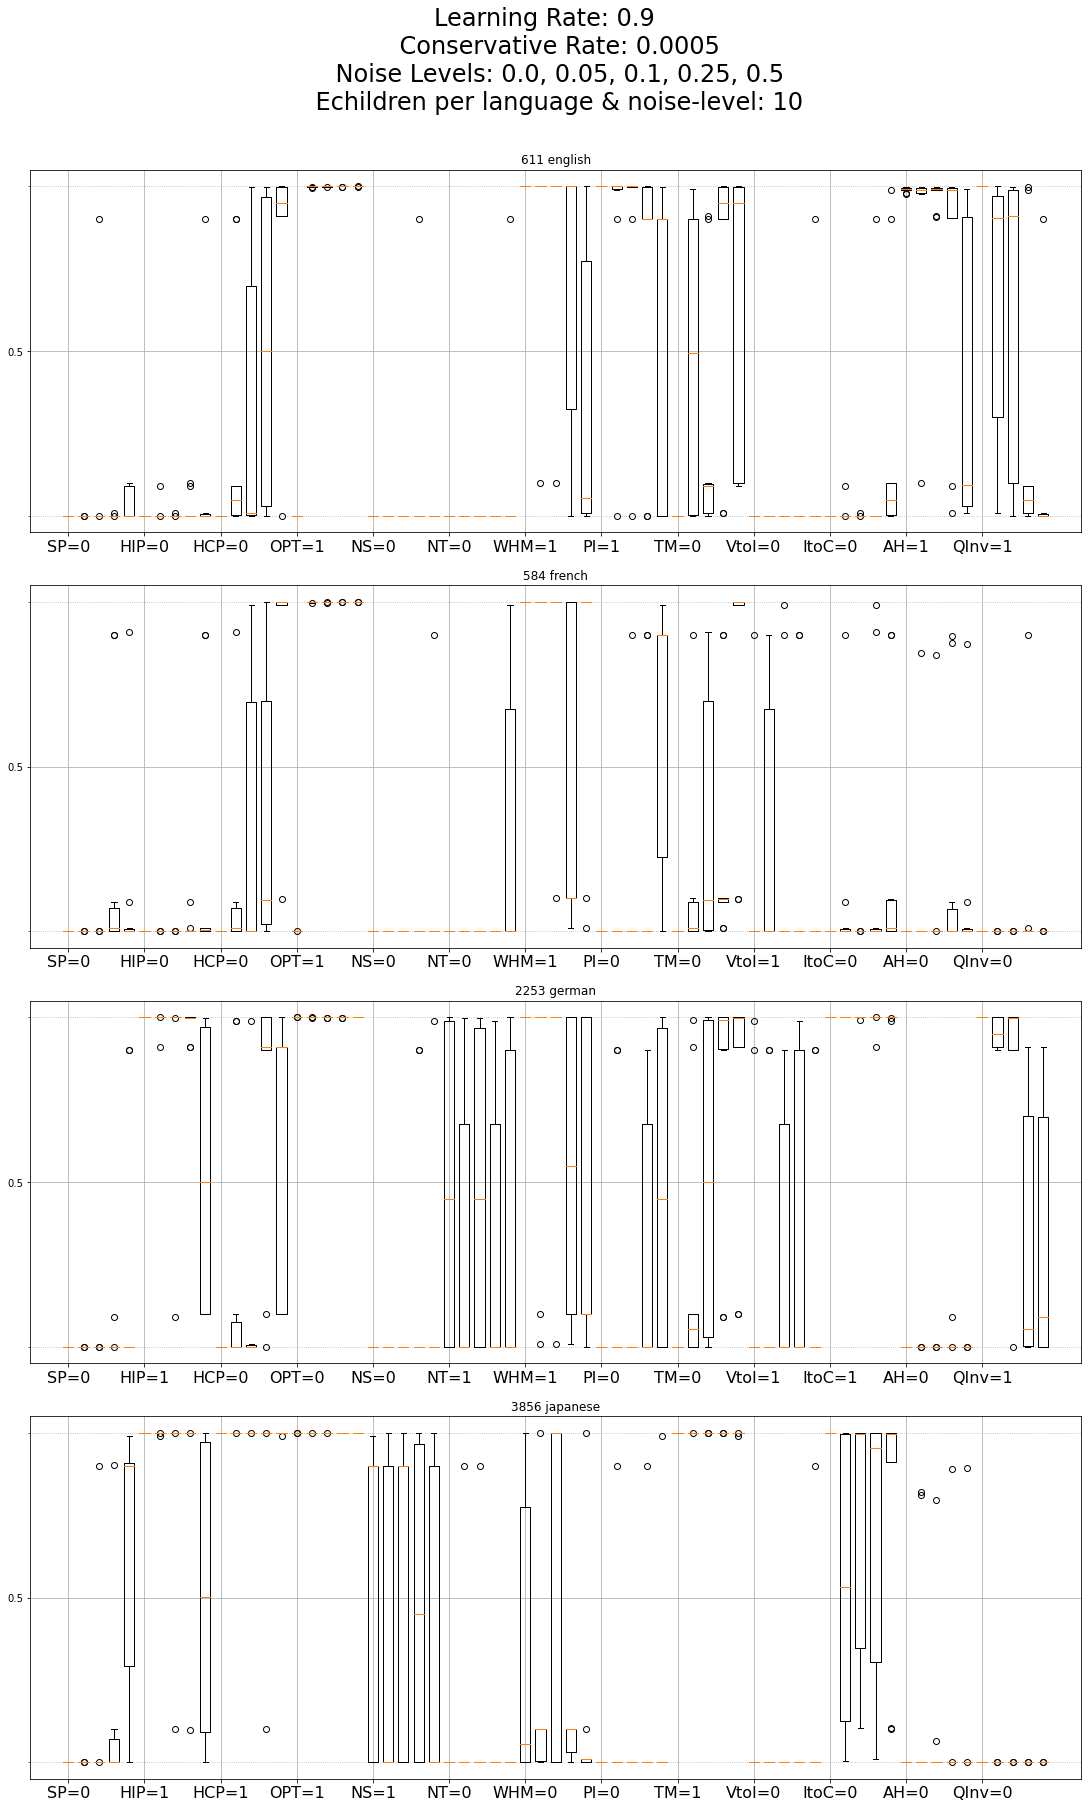

In [2]:
def barplot_output(pathname, image_output):
    plt.rcParams['figure.figsize'] = 15, 25
    hyperparams = re.search(r'rate:(?P<rate>.*)_consrate:(?P<consrate>.*)\.csv', pathname).groupdict()
    df = pd.read_csv(pathname)
    params = [p
                       for p in df.columns 
                       if p[0].isupper()]
    hyperparams['noiserates'] = list(df.noise.unique())
    fig, axs = plt.subplots(4, 1, constrained_layout=True)
    fig.suptitle(
    """Learning Rate: {rate}
    Conservative Rate: {consrate}
    Noise Levels: {noise_levels}
    Echildren per language & noise-level: {num_echildren}
    """.format( 
         noise_levels=', '.join(str(x) for x in df.noise.unique()),
        num_echildren=','.join(str(x) for x in df.groupby(['language', 'noise']).size().unique()),
        **hyperparams),
    fontsize=24)
    for language, ax in zip(df.language.unique(), axs):
        for noise_level, noise_amt in enumerate(df.noise.unique()):
            param_vals = (
                df[df.language.eq(language) & df.noise.eq(noise_amt)]
                [params]

            ).values
            ax.boxplot(param_vals, 
                       positions=[n + (noise_level/5) for n in range(len(params))], 
                       notch=False,
                       #autorange=True,
                       widths=1/7.5)
        grammar_str = format(language, '013b')
        xlabels = ['{}={}'.format(name, grammar_str[num])
                   for num, name in enumerate(params)]
        ax.set_xticks(range(len(params)))
        ax.set_xticklabels(xlabels, fontsize=16)
        ax.set_yticks([0.5])
        ax.set_yticks([0, 1], minor=True)
        ax.grid()
        ax.grid(axis='y', which='minor', ls=':')
        ax.set_title('{} {}'.format(language, languages[language]))
    
    fig.savefig(image_output)
    
barplot_output('../output_2020-10-28:17:21_rate:0.9_consrate:0.0005.csv', image_output='bars.pdf')